In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas line plots

Las gráficos tipo línea son una buena opción cuando queremos representar la evolción de una variable respecto al tiempo.

In [3]:
#Cargamos los datos
df = pd.read_csv('clean_stock_data.csv')
df.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [36]:
#Modificamos nuestro conjunto de datos para tenerlo de una forma más interesante
df_melt = pd.melt(df, id_vars = ['name'], var_name = 'month')
df_pivot = df_melt.pivot_table(index = ['month'], columns = 'name', values = 'value')
df_pivot = df_pivot.reset_index()
df_pivot.month = pd.Categorical(df_pivot.month, 
                      categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                      ordered=True)
df_pivot = df_pivot.sort_values(by='month', ascending=True)
df_pivot

name,month,APPLE,GOOGLE,IBM,MSFT
4,Jan,110.64,512.42,156.08,45.51
3,Feb,125.43,537.99,160.01,43.08
7,Mar,125.97,559.72,159.81,42.13
0,Apr,127.29,540.50,165.22,43.47
8,May,128.76,535.24,172.25,47.53
6,Jun,127.81,532.92,167.15,45.96
5,Jul,125.34,590.09,164.75,45.61
1,Aug,113.39,636.84,152.77,45.51
11,Sep,112.80,617.93,145.36,43.56
10,Oct,113.36,663.59,146.11,48.70


Una vez tenemos nuestra tabla de una forma más adecuada procedemos a realizar nuestro line plot.

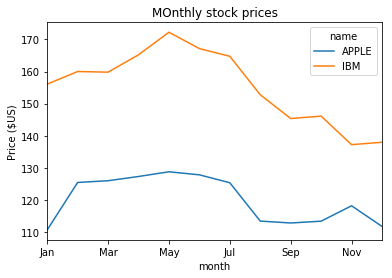

In [37]:
#Nos creamos una lista con las columnas que deseamos representar en el eje y 
y_columns = ['APPLE', 'IBM']

#Generamos el line pplot
df_pivot.plot(x = 'month', y = y_columns)

#Generamos el título de nuestra gráfico
plt.title('MOnthly stock prices')

#Añadimos el titulo del eje y
plt.ylabel('Price ($US)')

#Mostramos el resultado
plt.show()

# Pandas Scatter Plots

Los gráficos de tipo **Scatter Plot** se tratan de gráficos mut útiles a la hora de encontrar si existe o no algún tipo de correlación entre variables. Este gráfico dispone del parámetro **s** que nos permite controlar el radio de cada uno de los puntos de nuestro **Scatter Plot**.

In [39]:
#Cargamos nuestro conjunto de datos
df = pd.read_csv('auto-mpg.csv')

#Observamos que los datos se carguen de forma adecuada
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite


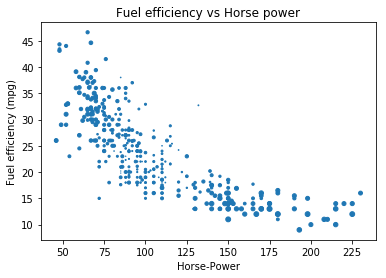

In [56]:
#Normalizamos el peso de los coches
normalize_weight = np.array(abs((df['weight']-df['weight'].mean())/df['weight'].std()))

#Nos creamos nuestro Scatter Plot
df.plot(kind = 'scatter', x = 'hp', y = 'mpg', s = 10*normalize_weight)

#Agregamos el título
plt.title('Fuel efficiency vs Horse power')

#Agregamos el título a los ejes
plt.xlabel('Horse-Power')
plt.ylabel('Fuel efficiency (mpg)')

#Mostramos el resultado
plt.show()

Podemos ver que los coches con una mayor cantidad de caballos, su eficiencia en términos de consumo de fuel es menor, es decir, consumen una mayor cantidad de fuel por milla recorrida.

# Pandas box plots

Pandas puede trazar múltiples plots en una misma figuera, pero existen ocasiones en los que estos plots no combiene representarlos juntos ya que las unidades no coinciden. El método **plot()** puede generar subplots, para cada una de las columnas trazadas, para ello dispone del argumento **subplots** que por defecto toma el valor de **False**, si lo cambiamos a **True** este generará subplots. Los boxplots, se tratan de gráficos muy interesantes para ver la distribución de una variable numérica, de una numérica en función de distintas variables categóricas.

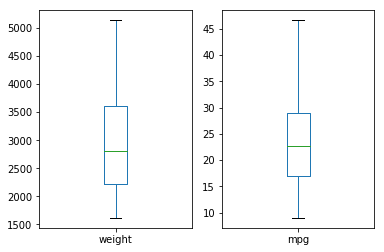

In [57]:
#Nos creamos un array de las columnas que queremos representar
cols = ['weight', 'mpg']

#Nos creamos el boxplot
df[cols].plot(kind = 'box', subplots = True)

#Mostramos el resultado
plt.show()

# Pandas hist, pdf and cdf

Cuando asignamos al argumento **kind** el valor de **hist**, además de realizar histogramas podemos mostrar la **PDF** y la **CDF**. Para representar la **PDF** asignamos al parámetro **normed** el valor de **True** y para representar la CDF además de asignar el valor de **True** a **normed** también le asingamos el valor de **True** a **cumulative**.

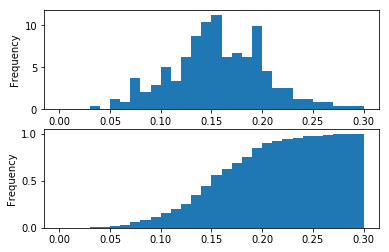

In [61]:
#Cargamos los datos
df = pd.read_csv('tips.csv')

#Fijamos el numero de subplots
fig, axes = plt.subplots(nrows=2, ncols=1)

#Nos creamos la PDF de la columna fraction
df.fraction.plot(ax = axes[0], kind = 'hist', bins = 30, normed = True, range=(0,.3))

#Nos creamos la CDF
df.fraction.plot(ax = axes[1], kind = 'hist', bins = 30, normed = True, cumulative = True, range = (0,.3))

#Mostramos los resultados
plt.show()

# Bachelor's degrees awarded to women

A continuación vamos a proceder a calcular una serie de estadísticos que en un conjunto de datos que nos indica el número de licenciaturas obtenidas por las mujeres entre 1970 y 2011. 

In [67]:
#Cargamos los datos
df = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col='Year')

#Visualizamos los datos
df.head(3)

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


In [68]:
#Calculamos los valores máximo para la columna Engineering
print(df['Engineering'].max())

19.0


In [69]:
#Calculamos el mínimo para la columna Engineering
print(df['Engineering'].min())

0.8


In [77]:
#Calculamos la media de mujeres que se graduaron cada año
mean = df.mean(axis = 'columns')

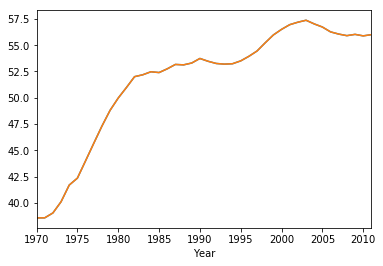

In [81]:
#Visualizamos los resultados
mean.plot(x = 'Year')
plt.show()

# Median vs mean

Es posible que en muchos conjuntos de datos exista una gran diferencia en la media y la mediana debido a la presencia de outliers.

In [83]:
#Cargamos los datos
df = pd.read_csv('titanic.csv')

In [84]:
#Realizamos un describe de nuestro conjunto de datos
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


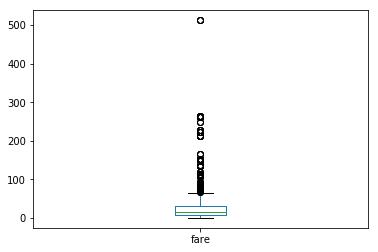

In [85]:
#Realizamos un boxplot de la columna fare(tarifa)
df['fare'].plot(kind = 'box')
plt.show()

Nuestro boxplot nos muestra que existe una gran presencia de outliers. Además podemos ver como la gente que se acumula entre el primer y el segundo cuartil (25% de nuestro conjunto de datos) tiene un varianza menor que para el caso de la gente que se agrupo entre el segundo y el tercer cuartil(25% de nuestro conjunto de datos).

# Quantiles

A continuación vamos a realizar una investigación de la esperanza de vida en los distintos países alrededor del mundo. En primer lugar veremos el número de países de los que disponemos para el año 2015. Seguidamente calcularemos el cuantil 0.05 y el cuantil 0.95. Finalmente visualizaremos un boxplot para los años 1800,1850,1900,1950, 2000.

In [88]:
#Cargamos los datos
df = pd.read_csv('life_expectancy_at_birth.csv')

#Vemos si se ha realizado la carga correctamente 
df.head(3)

,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#Vemos el número de países para el año 2015
print(df['2015'].count())

208


In [90]:
#Calculamos los cuantiles
print(df.quantile([0.05, 0.95]))

      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 218 columns]


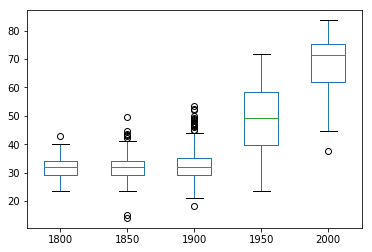

In [91]:
#Vemos los boxplots para cada uno de los años
years = ['1800', '1850', '1900', '1950', '2000']
df[years].plot(kind = 'box')
plt.show()

# Separate and summarize

A continuación veremos como los automóviles norteamericanos difieren del promedio global  y de las desviación estándar global. ¿Cómo varía la distribución de eficiencia de fuel respecto al resto en promedio y en desviación estándar?

In [92]:
#Cargamos los datos
df = pd.read_csv('auto-mpg.csv')

#Vemos que se cargaron de forma adecuada
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite


In [93]:
#Obtenemos la media y la desviación estándar de forma global
global_mean = df.mean()
global_std = df.std()

#Filtramos los datos por US
df_US = df[df['origin'] == 'US']

#Obtenemos la media y la desviación estándar para USA
mean_US = df_US.mean()
std_US = df_US.std()

#Vemos las diferencias
print(mean_US - global_mean)
print(std_US - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


Aquí podemos ver como los automóviles en USA son más pesados que en global, además podemos ver que la eficiencia, es decir, el consumo de fuel por milla es inferior respecto al global.

# Separate and plot

Separar poblaciones en un dataset, puede servir para ver diferencias en las distribuciones una vez las poblaciones están separadas. A continuación vamos a proceder a realizar un análisis para las tres clases que embarcaron en el titanic para observar claras diferencias en cada una de las clases.

In [94]:
#Cargamos los datos
df = pd.read_csv('titanic.csv')

#Observamos que se cargaron de forma correcta
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Por ejemplo podemos ver por clases social el precio que pagaron para embarcarse.

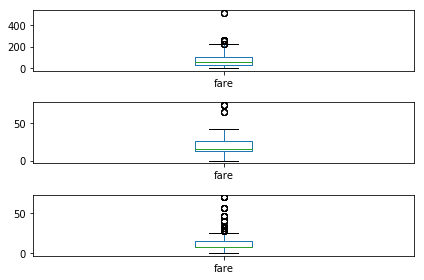

In [101]:
#Nos creamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1)

#Creamos el boxplot para la clase social 1
df.loc[df['pclass'] == 1].plot(kind = 'box', y = 'fare', ax = axes[0])

#Creamos el boxplot para la clase social 2
df.loc[df['pclass'] == 2].plot(kind = 'box', y = 'fare', ax = axes[1])

#Creamos el boxplot para la clase social 3
df.loc[df['pclass'] == 3].plot(kind = 'box', y = 'fare', ax = axes[2])


#Mostramos el resultado
plt.tight_layout()
plt.show()

En este caso podemos ver como en la clase social 1, se trata de la clase social que pago una mayor cantidad de dinero. Sin embargo podemos ver que fue en la clase social 3, donde aparecen más valores anómalos, es decir, gente que pago un precio más elevado que lo que pago la gente de esa misma clase social para embarcar. En el resto de clases sociales se observa que estos valores anómalos son menos frecuentes. También se puede ver en la clase 2 como la varianza, es mayor para el 25% de las personas que se encuentran por encima de la mediana, es decir, el rango de precios que la gente pago fue mayor para ese rango. Otra observación es que se puede ver como los bigotes, para la clase social 2 y la clase social 1 son más o menos de igual longitud, es decir, las personas que pagaron por debajo del primer percentil y la gente que pago por encima del tercer percentil se mantiene igual, sin embargo, para la clase social 1, el número de personas que pagaron por debajo del primer percentil es considerablemente menor que el número de personas que pagaron por encima del tercer percentil. Esto deja una muestra clara de la gran diferencia de clases que se embarcaron en esta trágica travesía.